# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [84]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [85]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet  yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [86]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import sklearn as sk
from sklearn.model_selection import train_test_split

# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [87]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

dataframe_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    dataframe_list.append(df)


dataframe = pd.concat(dataframe_list, axis=0, ignore_index=True)


dataframe.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556043.000,1571207.000,1556043.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556043.000
mean,1.673,1.502,2.879,1.056,164.342,162.255,1.252,12.613,1.107,0.492,2.192,0.332,0.298,18.559,2.296
std,0.470,1.142,11.978,0.749,65.736,70.007,0.486,11.688,1.258,0.073,2.641,1.781,0.035,14.289,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-730.000,-4.500,-0.500,-56.840,-35.740,-0.300,-730.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,14099.310,99.000,265.000,265.000,4.000,655.350,87.560,3.300,300.880,853.550,0.300,906.350,2.750


In [88]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1556043 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1556043 non-null  float64       
 6   store_and_fwd_flag     1556043 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [89]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
dataframe.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1556043.000,1571207.000,1556043.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1556043.000
mean,1.673,1.502,2.879,1.056,164.342,162.255,1.252,12.613,1.107,0.492,2.192,0.332,0.298,18.559,2.296
std,0.470,1.142,11.978,0.749,65.736,70.007,0.486,11.688,1.258,0.073,2.641,1.781,0.035,14.289,0.707
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-730.000,-4.500,-0.500,-56.840,-35.740,-0.300,-730.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.930,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,14099.310,99.000,265.000,265.000,4.000,655.350,87.560,3.300,300.880,853.550,0.300,906.350,2.750


### Descripción de Columnas del Dataset.


In [90]:
# Listado de tipos de variables presentes en el dataset
dataframe.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [91]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

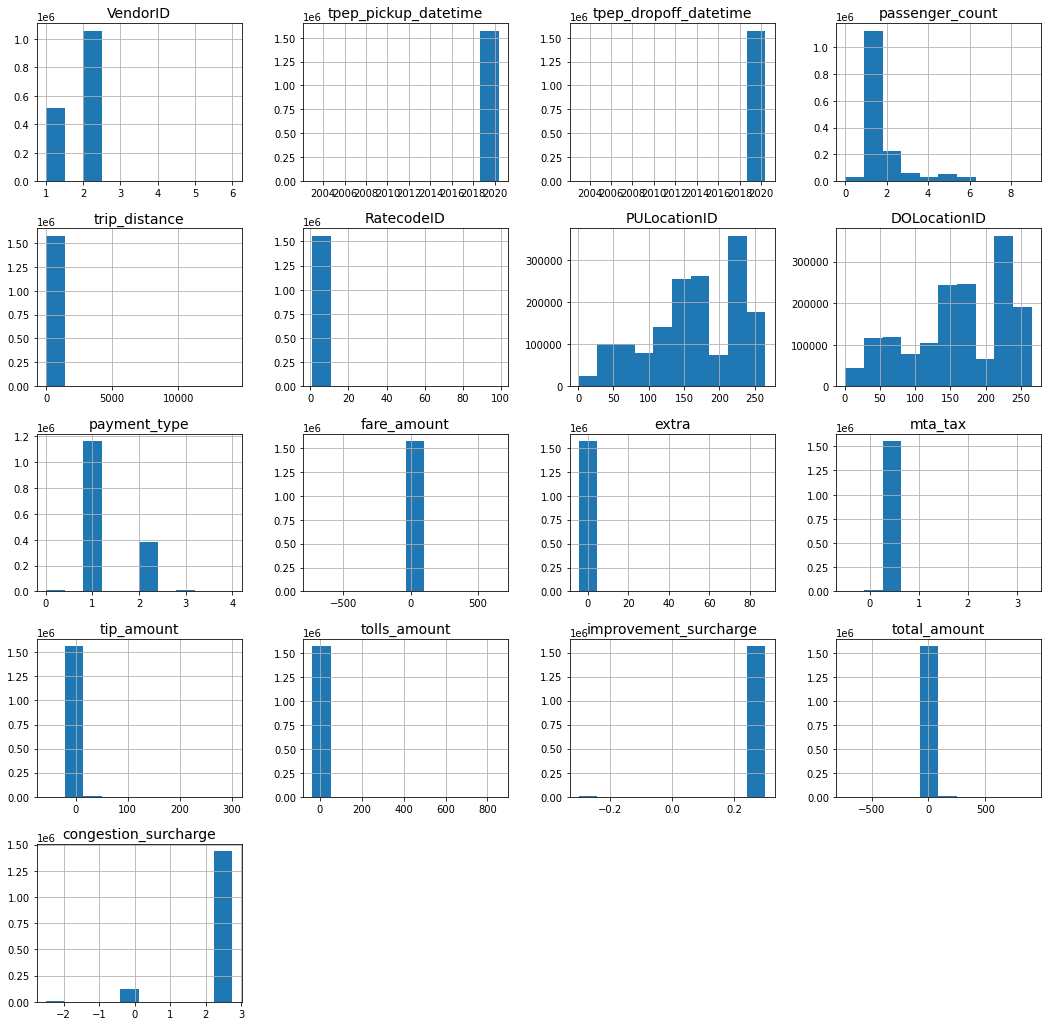

In [92]:
#imprimo distribuciones 
display_dataset_distributions(dataframe)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [93]:
print_categorical(dataframe.VendorID)

Ordinalidad: [2 1 5 6]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          1
6         60
1     514387
2    1056759
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [94]:
print_null_info(dataframe.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [95]:
print_null_info(dataframe.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [96]:
print_null_info(dataframe.passenger_count)

Cantidad de nulos: 15164/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [97]:
print_null_info(dataframe.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [98]:
print_categorical(dataframe.PULocationID)

Ordinalidad: [170 142  50 143 140 163 100 164 239 224 234 230  87  42  65  90 144  68
 237 238 107 236 233 141 138  43 151 246 132 166 148 162 186  48 113  79
 211 161  24 231 249 262 114  37 209  88  75 261 137 263  74  13  49 146
 229  41 168 158 264 159 255  22  97 152 226 228 130 125  33  40 108 223
 205 232 189 171  51 244   7  45 202   4  62  82 216 196  80  52 129  38
  36 145  19 124  95  11 213 194  66  16  17 169  61 181 179  26  39  32
 116 167 260 193 188 243 265 190  89 256 126 123 134  25 197 208  12  56
  71 220  78 235 133 136  15  76 195 117 112 102  21  10  64 254 247  47
  28  93  85 106 157 183  72  60  35 147 225 127 215 135 139 180  18 217
 253 218  92 185 203  69 219 212 200  81 198  94  73  63  98 101 121  83
  86 257 174  70 210 242 182 258 122 160 128 173 240  14 191 155  58 241
   1 131 165 250 175 248  67   9  29 259  91 222 177   3 207  77 192  54
 227  20 178  53  34 149   8 120 118 206 221 252 150 153  59 214  23 119
  57  46 201  99   5  55 115  31 154  


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [99]:
print_categorical(dataframe.DOLocationID)

Ordinalidad: [162 142 246 166 141 238 261 161  43 148 113 186 229  97 264 170 249  13
  87 236 239 230 164 145  48 100 163  21  25 143 231  65 237  45 232 262
 224 144  79  85  71 234 228 263 177  51 151 181 107 138 134 211 114 223
  67  41 233  88 158  68  75 137 125 140  24  90 152  61 242 256 243 173
 209  74 193 265  50 244 260 198 179 132 252 155  66  12 210 146 225  37
  83 257 255 200  69   1 102 235  56  58 116 217  62  42  52 254  40   7
 205 176  89  39 218  49 171 219 213  93  70 120  80 129 192 226  33  94
  36  91 157  54 135 250 119 195 215 112  53 130   4  14 202  10  76 247
 160  95  64 189 216  92  17  28 167  86  73 188 182  16 197  26  82 203
 106 121 136 222 259 241 127  34 191 168 149 196 133 165  72  20  98 159
 227 126 169   8  22 253 147  77   9  29 174 240 117 220  78 194  63 123
 124 128 122 139 258  81 206 245 108 153 190 178 208  38 180  35 201 212
 131  47  32 251 183  55 172  99  19 185  11 175  18 248 111  31 150  57
  15   6 101 118   3 184 154  23 207 2


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [100]:
print_categorical(dataframe.RatecodeID)

Ordinalidad: [ 1. nan  2.  5.  3.  4. 99.  6.]
Cantidad de nulos: 15164/1571207
Ocurrencias:
6.000           7
99.000         71
4.000        1197
3.000        3241
5.000        8561
2.000       35691
1.000     1507275
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [101]:
print_categorical(dataframe.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 15164/1571207
Ocurrencias:
Y      16191
N    1539852
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [102]:
print_categorical(dataframe.payment_type)

Ordinalidad: [1 2 3 0 4]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4644
3       8086
0      15164
2     381674
1    1161639
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [103]:
print_null_info(dataframe.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [104]:
print_null_info(dataframe.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [105]:
print_null_info(dataframe.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [106]:
print_null_info(dataframe.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [107]:
print_null_info(dataframe.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [108]:
print_null_info(dataframe.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [109]:
print_null_info(dataframe.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [110]:
print_null_info(dataframe.congestion_surcharge)

Cantidad de nulos: 15164/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [111]:
print_null_info(dataframe.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [112]:
# verificamos cantidad de items repetidos y los eliminamos
#dataframe.duplicated().sum(), dataframe.size
dataframe = dataframe.drop_duplicates()
dataframe.size

29850444

In [113]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(dataframe.columns)):
  col_name = dataframe.columns[i]
  col_data = dataframe[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571076
tpep_pickup_datetime: 0/1571076
tpep_dropoff_datetime: 0/1571076
passenger_count: 15033/1571076
trip_distance: 0/1571076
RatecodeID: 15033/1571076
store_and_fwd_flag: 15033/1571076
PULocationID: 0/1571076
DOLocationID: 0/1571076
payment_type: 0/1571076
fare_amount: 0/1571076
extra: 0/1571076
mta_tax: 0/1571076
tip_amount: 0/1571076
tolls_amount: 0/1571076
improvement_surcharge: 0/1571076
total_amount: 0/1571076
congestion_surcharge: 15033/1571076
airport_fee: 1571076/1571076


In [114]:
# quitamos las columnas VendorID, RateCodeID, store_and_fwd_flag y airport_fee ya que son nulas o no aportan valor
cols_to_drop = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'airport_fee']
print(f'Total original cols:{len(dataframe.columns)}')
dataframe = dataframe.drop(cols_to_drop, axis=1)
print(f'Total cols after removing unused data:{len(dataframe.columns)}')

Total original cols:19
Total cols after removing unused data:15


#### 2.1.1 Análisis de faltantes
La única categoría con faltantes no filtrada es passenger_count. Se entiende que este dato es ingresado manualmente. 
Se propone eliminar dichas muestras ya que representan el 1% aproximadamente del dataset total


In [240]:
# descarto filas con passenger count o congestion_surcharge nulo
dataframe = dataframe.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(dataframe['passenger_count'])

1556043

### 2.2 Ingeniería de datos

In [220]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(dataframe['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(dataframe['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
dataframe['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 
day_interval = dataframe['tpep_pickup_datetime'].dt.hour
dataframe['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
dataframe['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
dataframe['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
dataframe['morning'].values.isnull().sum(), dataframe['afternoon'].values.isnull().sum(), dataframe['evening'].values.isnull().sum()

In [221]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
location_id_min_th_count = 0.01
total_items = len(dataframe['PULocationID'])

# convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
pulocation_id_freq_map = (dataframe['PULocationID'].value_counts(sort=True) / total_items).to_dict()
dataframe['PULocationIDFreq'] = dataframe['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# convertimos DOLocationID
dolocation_id_freq_map = (dataframe['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
dataframe['DOLocationIDFreq'] = dataframe['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

#pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
def clear_location_low_values(x):
  if x <= location_id_min_th_count:
    return 0
  return x

dataframe['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x))
dataframe['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x))


0         0.030
1         0.027
2         0.020
3         0.000
4         0.026
           ... 
1571202   0.020
1571203   0.000
1571204   0.023
1571205   0.000
1571206   0.026
Name: DOLocationIDFreq, Length: 1571076, dtype: float64

In [235]:
# termino de borrar todos los negatios
dataframe['morning'].values.isnull().sum(), dataframe['afternoon'].values.isnull().sum(), dataframe['evening'].values.isnull().sum()

(0, 0, 0)

In [222]:
dataframe.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,PULocationIDFreq,DOLocationIDFreq
count,1556043.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1571076.000,1556043.000,1571076.000,1571076.000,1571076.000
mean,1.502,2.878,164.345,162.259,1.253,12.612,1.107,0.492,2.193,0.332,0.298,18.557,2.296,953.111,0.024,0.020
std,1.142,11.979,65.734,70.005,0.486,11.687,1.258,0.073,2.641,1.781,0.035,14.288,0.707,3658.003,0.012,0.012
min,0.000,-30.620,1.000,1.000,0.000,-730.000,-4.500,-0.500,-56.840,-35.740,-0.300,-730.300,-2.500,-48.000,0.000,0.000
25%,1.000,0.970,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500,385.000,0.016,0.010
50%,1.000,1.600,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500,635.000,0.024,0.020
75%,2.000,2.930,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500,1020.000,0.031,0.027
max,9.000,14099.310,265.000,265.000,4.000,655.350,87.560,3.300,300.880,853.550,0.300,906.350,2.750,185770.000,0.045,0.044


## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [118]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

feature_cols = ['passenger_count'] # TODO ADD HERE COLS
target_col = ['DOLocationID'] # TODO DOUBLE CHECK COL

X = dataframe[feature_cols].values
y = dataframe[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
